In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,ConfusionMatrixDisplay

plt.style.use('seaborn-talk')

In [157]:
data = pd.read_csv('data/full_HAR_dataset.csv', index_col=0)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


In [158]:
data.iloc[:,:-1].max().value_counts(),data.iloc[:,:-1].min().value_counts()

(1.0    561
 dtype: int64,
 -1.0    561
 dtype: int64)

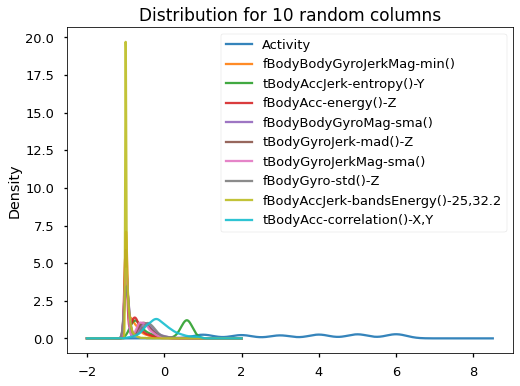

In [187]:
rand_cols = np.random.choice(data.columns, 10)

fig, ax = plt.subplots(figsize = (8,6))

data[rand_cols].plot.kde(ax=ax,alpha=0.9)

ax.set_title('Distribution for 10 random columns', size=17)
# ax.set_ylabel('Density', size=14)
# ax.set_xlabel('Feature Values', size=14)
plt.show()

<AxesSubplot:>

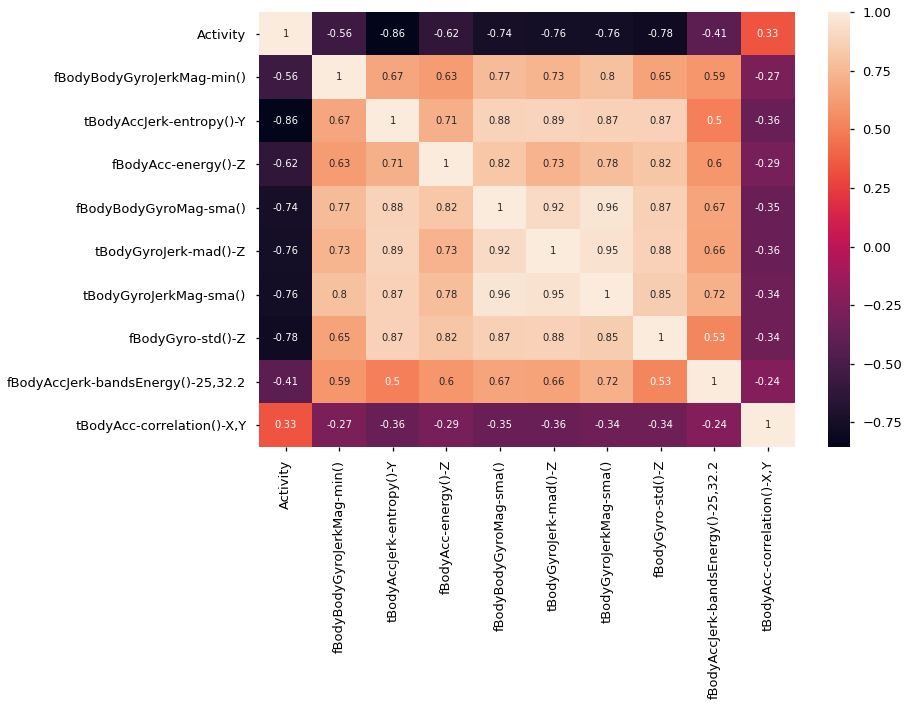

In [188]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(data[rand_cols].corr(),annot=True,ax=ax)

### Diving the data into splits with similar class distribution

In [162]:
data['Activity'].unique()

array([5, 4, 6, 1, 3, 2])

In [167]:
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.33, 
                                          random_state=19)

feature_cols = data.columns[:-2]
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

x_train = data.iloc[train_idx][feature_cols]
y_train = data.iloc[train_idx]['Activity']

x_test = data.iloc[test_idx][feature_cols]
y_test = data.iloc[test_idx]['Activity']

In [168]:
x_train.shape, y_train.shape

((6900, 560), (6900,))

In [169]:
x_test.shape

(3399, 560)

In [170]:
logistic = LogisticRegression(solver='liblinear')
fitted_lgstc = logistic.fit(x_train, y_train)

preds = fitted_lgstc.predict(x_test)

 #### Evaluation

In [173]:
precision, recall, f1score, _ = score(y_test, preds, average='weighted')

In [174]:
precision

0.9855787835199135

In [175]:
recall

0.9855839952927331

In [176]:
f1score

0.9855792261469368

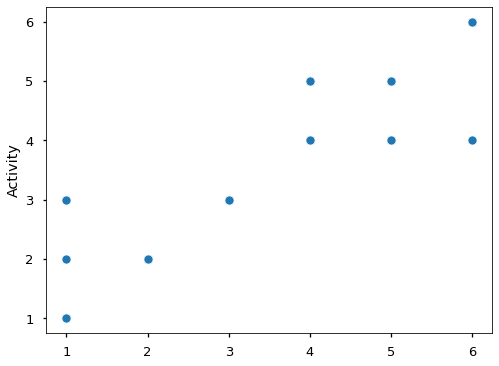

In [184]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=preds,y=y_test,ax=ax)
plt.show()

In [189]:
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

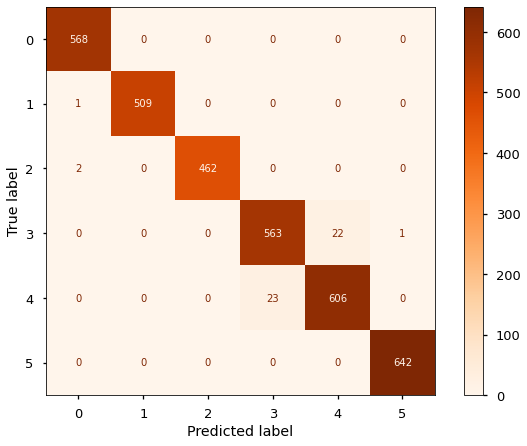

In [190]:
disp.plot(cmap='Oranges');